In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pandas_ta as ta

warnings.filterwarnings('ignore')

In [2]:
with open("../btc_usd_1d.pkl", "rb") as f:
    df = pickle.load(f)
df.reset_index(inplace=True)
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df.set_index('Date', inplace=True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2614 entries, 2014-11-29 to 2022-01-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2614 non-null   float64
 1   High    2614 non-null   float64
 2   Low     2614 non-null   float64
 3   Close   2614 non-null   float64
 4   Volume  2614 non-null   float64
dtypes: float64(5)
memory usage: 122.5 KB
None


In [4]:
# start_date = '20150104'
# end_date = '20211214'
# DJI_df = fdr.DataReader('dji', start_date, end_date).reset_index()
# DJI_df

# EXC = fdr.DataReader('USD/KRW', start_date, end_date).reset_index()
# EXC

#df.ta.log_return(cumulative=True, append=True)
#df.ta.percent_return(cumulative=True, append=True)
#df.columns

In [5]:
#df.ta.strategy("Momentum")

39it [00:02, 16.96it/s]


In [6]:
predict_df = df
predict_df['y_true'] = predict_df['Close'].shift(-1) # 위 함수와 같은 동작수행
predict_df = predict_df[:-1]
predict_df

,Open,High,Low,Close,Volume,AO_5_34,APO_12_26,BIAS_SMA_26,BOP,AR_26,...,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,y_true
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,NaN,NaN,NaN,0.020906,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.34
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,NaN,NaN,NaN,-0.372549,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378.39
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,NaN,NaN,NaN,0.214440,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.25
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,NaN,NaN,NaN,0.112713,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,376.67
2014-12-03,379.25,383.00,374.23,376.67,2.998358e+06,NaN,NaN,NaN,-0.294185,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,42378.23,42589.90,41145.23,41683.21,1.664704e+03,-3197.149147,-2287.377949,-0.069796,-0.481093,60.827977,...,39.179757,60.347535,69.711019,-0.428430,-0.407445,-26.296567,-25.551853,50.066401,-56.621761,40736.05
2022-01-20,41733.21,43518.69,40554.14,40736.05,2.425153e+03,-3272.737588,-1993.623718,-0.083296,-0.336361,64.431421,...,37.620526,47.354520,60.262539,-0.432786,-0.413215,-27.679742,-25.855838,45.557461,-75.960871,36495.46
2022-01-21,40654.72,41115.58,35423.00,36495.46,6.201046e+03,-3989.753882,-1892.149679,-0.168435,-0.730646,55.707374,...,33.465707,24.370841,44.024299,-0.439363,-0.418819,-32.568390,-26.814774,36.436322,-88.127758,35091.11


In [7]:
#결측치 처리
predict_df2 = predict_df.dropna(axis=1, how='all')
predict_df2 = predict_df2[40:]

predict_df3 = predict_df2.interpolate(method='values')
predict_df4 = predict_df3.dropna(axis=0, how='any')

In [8]:
col_dict = predict_df4.columns
col_dict

minmax_scaler = MinMaxScaler()
minmax_scaled_predict_df = minmax_scaler.fit_transform(predict_df4)
minmax_scaled_predict_df = pd.DataFrame(minmax_scaled_predict_df)
minmax_scaled_predict_df.columns = col_dict

In [9]:
minmax_scaled_predict_df

,Open,High,Low,Close,Volume,AO_5_34,APO_12_26,BIAS_SMA_26,BOP,AR_26,...,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,y_true
0,0.000100,0.000000,0.000058,0.000000,0.003882,0.507392,0.521393,0.198718,0.282476,0.108107,...,0.408553,0.983756,0.977031,0.152552,0.196314,0.194631,0.099865,0.285083,0.471704,0.000249
1,0.000000,0.000161,0.000104,0.000260,0.006393,0.507547,0.521388,0.262143,0.865491,0.110970,...,0.464483,0.983756,0.981364,0.142630,0.185746,0.220948,0.108390,0.500176,0.612460,0.000315
2,0.000260,0.000308,0.000422,0.000325,0.007773,0.507858,0.521358,0.284504,0.667704,0.136324,...,0.513327,0.983756,0.983756,0.133611,0.175012,0.245274,0.119770,0.476262,0.647910,0.000315
3,0.000326,0.000322,0.000415,0.000326,0.004583,0.508138,0.521330,0.293693,0.497953,0.137967,...,0.568441,1.000000,0.989171,0.125461,0.164477,0.264462,0.132737,0.515011,0.648151,0.000567
4,0.000326,0.000467,0.000483,0.000578,0.004270,0.508422,0.521393,0.354888,0.924385,0.155914,...,0.626228,1.000000,0.994585,0.118592,0.154357,0.294719,0.148918,0.632932,0.784486,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0.626216,0.616033,0.619923,0.615789,0.000002,0.391532,0.377129,0.311095,0.254875,0.103577,...,0.360903,0.603475,0.697110,0.165144,0.171790,0.291729,0.248744,0.449752,0.433782,0.601721
2557,0.616637,0.629536,0.610975,0.601726,0.000003,0.388729,0.395975,0.300182,0.327688,0.115889,...,0.343940,0.473545,0.602625,0.163746,0.169903,0.281832,0.246195,0.372317,0.240391,0.538755
2558,0.600621,0.594598,0.533291,0.538760,0.000008,0.362143,0.402486,0.231356,0.129326,0.086082,...,0.298739,0.243708,0.440243,0.161636,0.168071,0.246853,0.238152,0.215673,0.118722,0.517903
2559,0.538138,0.532233,0.511747,0.517908,0.000006,0.323413,0.404935,0.214463,0.255462,0.068479,...,0.214721,0.080256,0.265837,0.158747,0.166190,0.212409,0.225492,0.204114,0.104349,0.535758


In [10]:
minmax_scaled_predict_df

,Open,High,Low,Close,Volume,AO_5_34,APO_12_26,BIAS_SMA_26,BOP,AR_26,...,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,TRIX_30_9,TRIXs_30_9,TSI_13_25_13,TSIs_13_25_13,UO_7_14_28,WILLR_14,y_true
0,0.000100,0.000000,0.000058,0.000000,0.003882,0.507392,0.521393,0.198718,0.282476,0.108107,...,0.408553,0.983756,0.977031,0.152552,0.196314,0.194631,0.099865,0.285083,0.471704,0.000249
1,0.000000,0.000161,0.000104,0.000260,0.006393,0.507547,0.521388,0.262143,0.865491,0.110970,...,0.464483,0.983756,0.981364,0.142630,0.185746,0.220948,0.108390,0.500176,0.612460,0.000315
2,0.000260,0.000308,0.000422,0.000325,0.007773,0.507858,0.521358,0.284504,0.667704,0.136324,...,0.513327,0.983756,0.983756,0.133611,0.175012,0.245274,0.119770,0.476262,0.647910,0.000315
3,0.000326,0.000322,0.000415,0.000326,0.004583,0.508138,0.521330,0.293693,0.497953,0.137967,...,0.568441,1.000000,0.989171,0.125461,0.164477,0.264462,0.132737,0.515011,0.648151,0.000567
4,0.000326,0.000467,0.000483,0.000578,0.004270,0.508422,0.521393,0.354888,0.924385,0.155914,...,0.626228,1.000000,0.994585,0.118592,0.154357,0.294719,0.148918,0.632932,0.784486,0.000613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0.626216,0.616033,0.619923,0.615789,0.000002,0.391532,0.377129,0.311095,0.254875,0.103577,...,0.360903,0.603475,0.697110,0.165144,0.171790,0.291729,0.248744,0.449752,0.433782,0.601721
2557,0.616637,0.629536,0.610975,0.601726,0.000003,0.388729,0.395975,0.300182,0.327688,0.115889,...,0.343940,0.473545,0.602625,0.163746,0.169903,0.281832,0.246195,0.372317,0.240391,0.538755
2558,0.600621,0.594598,0.533291,0.538760,0.000008,0.362143,0.402486,0.231356,0.129326,0.086082,...,0.298739,0.243708,0.440243,0.161636,0.168071,0.246853,0.238152,0.215673,0.118722,0.517903
2559,0.538138,0.532233,0.511747,0.517908,0.000006,0.323413,0.404935,0.214463,0.255462,0.068479,...,0.214721,0.080256,0.265837,0.158747,0.166190,0.212409,0.225492,0.204114,0.104349,0.535758


In [11]:
from sklearn.model_selection import train_test_split
data = minmax_scaled_predict_df[col_dict[:-1]]
target = minmax_scaled_predict_df['y_true']

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

In [13]:
model = LinearRegression()
LR = model.fit(x_train, y_train)

In [14]:
y_pred = model.predict(x_valid)

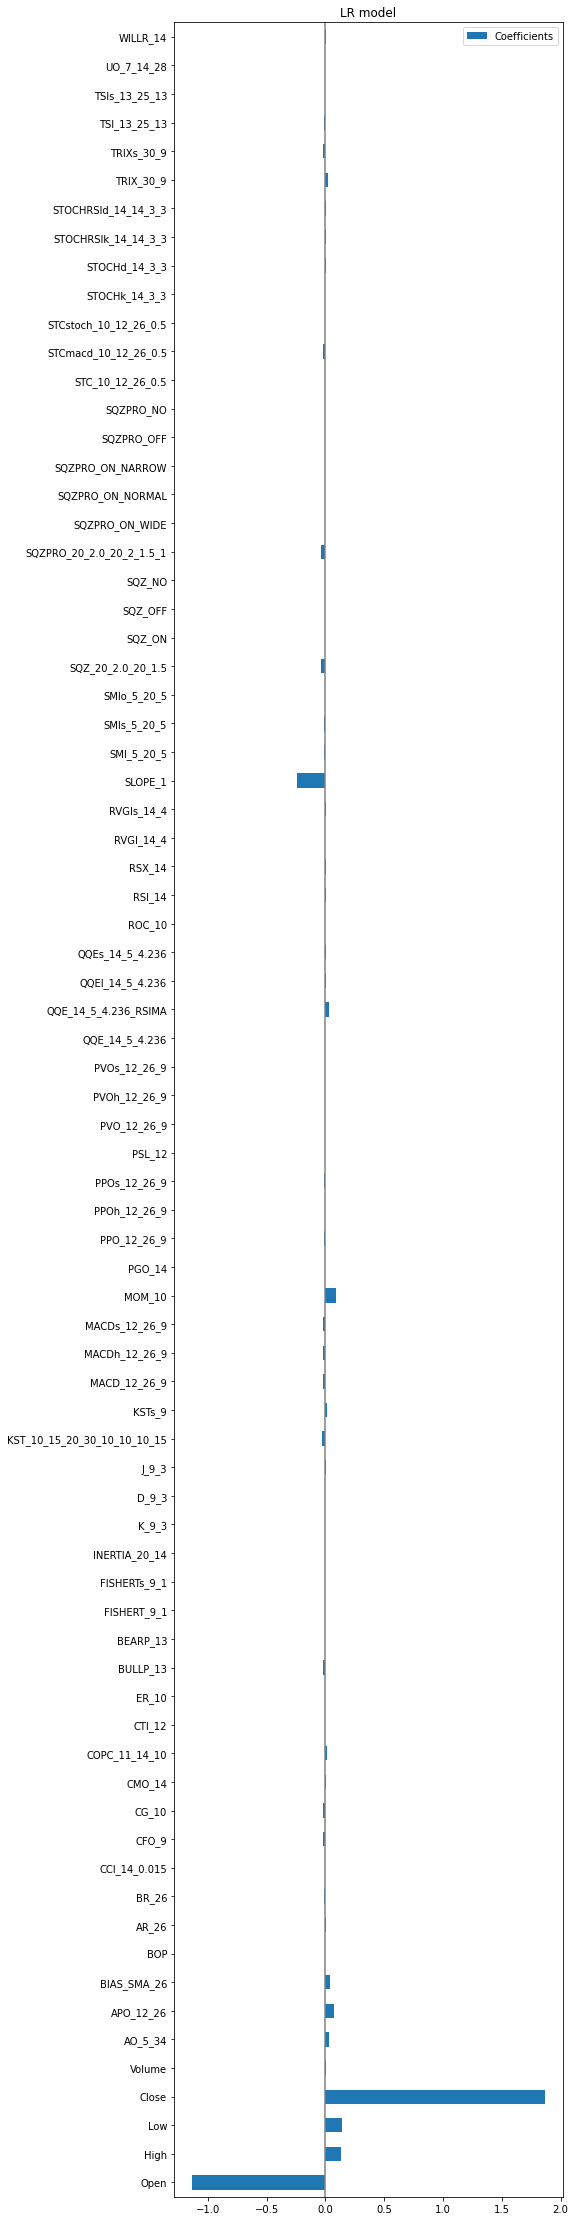

In [15]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [16]:
y_pred

array([0.16762466, 0.17056205, 0.17067971, 0.17383778, 0.16487197,
       0.14739784, 0.15234439, 0.14766152, 0.14901324, 0.14991876,
       0.14700417, 0.14806841, 0.15035041, 0.1494091 , 0.15006611,
       0.15129598, 0.15453045, 0.15738609, 0.15962944, 0.15890188,
       0.15852447, 0.16013588, 0.15741096, 0.14971149, 0.15173034,
       0.14837602, 0.15550945, 0.15605815, 0.15644233, 0.15757543,
       0.15679278, 0.15785763, 0.15657961, 0.1548975 , 0.15366722,
       0.15455224, 0.15534128, 0.15745241, 0.15421335, 0.15474618,
       0.15873993, 0.16029063, 0.16399917, 0.1667303 , 0.168886  ,
       0.16706669, 0.16668967, 0.16758534, 0.16500631, 0.16537207,
       0.16783724, 0.17135827, 0.17381979, 0.18633055, 0.18993374,
       0.18962549, 0.19266321, 0.1916747 , 0.19207385, 0.20087064,
       0.19494883, 0.19727655, 0.19933483, 0.2015102 , 0.20063662,
       0.19691604, 0.20368467, 0.20608797, 0.22732805, 0.22835748,
       0.21745673, 0.22748101, 0.22460297, 0.22338144, 0.22991

In [17]:
y_valid = y_valid.reset_index(drop=True)

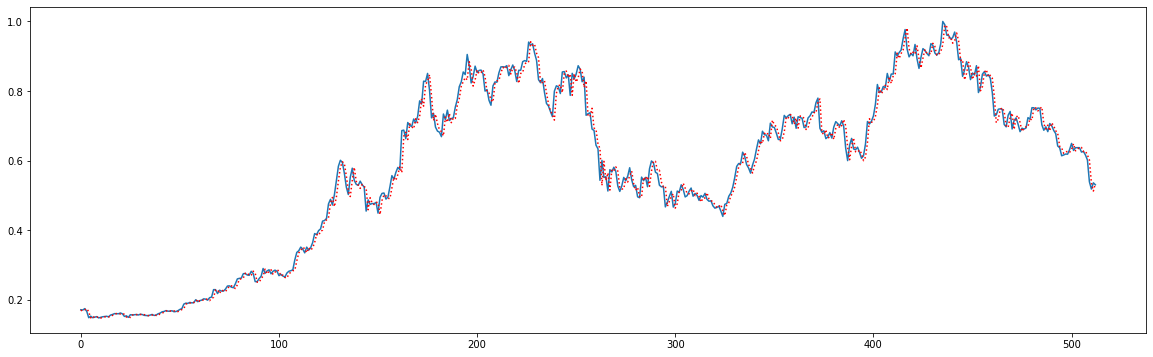

In [18]:
plt.figure(figsize=(20, 6))
plt.plot(y_valid)
plt.plot(y_pred, color='red', linestyle=":")

In [19]:
mean_squared_error(y_valid, y_pred)

0.0006390994603650458

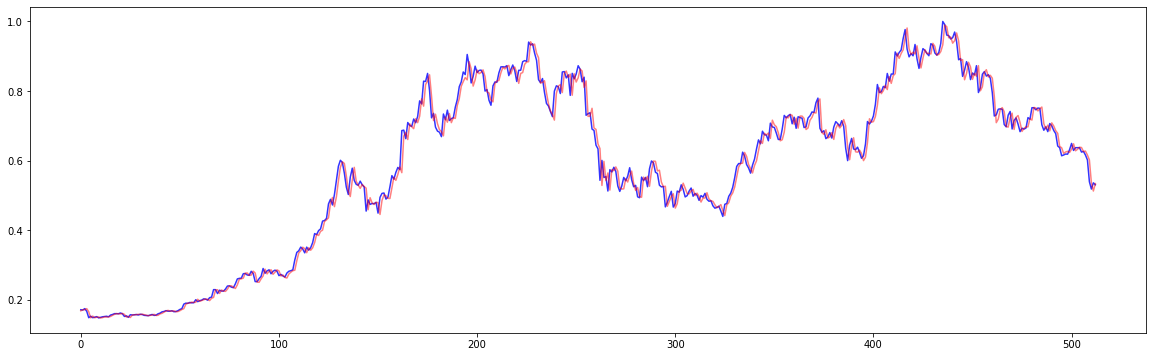

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(pd.Series(y_valid), alpha=0.8, color='b')
plt.plot(pd.Series(LR.predict(x_valid)), alpha=0.5, color='r')
plt.show()
